<a href="https://colab.research.google.com/github/okay2528/Fastai_Lesson_Project/blob/master/NYC_TLC_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# here's how I modify the notebook and run on Colab fine
from google.colab import auth
auth.authenticate_user()  # login

import os
os.environ['PROJECT_ID'] = 'quiet-being-241109'

# !pip install datalab
import google.datalab.bigquery as bq

# # then just query
# sql = 'SELECT 1'
# bq.Query(sql).execute().result().to_dataframe()

# Imports. Run in Google Data Lab
import google.datalab.bigquery as bq
import pandas as pd
 

,f0_
0,1


# Review data

In [9]:
## Review data with sample 1000 records
# Create and run a SQL query for the taxi_data from 2021 and 2022
sql_code = '(SELECT * FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2021` LIMIT 1000) \
                   union all (SELECT * FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022` LIMIT 1000)'

query = bq.Query(sql_code)
output_options = bq.QueryOutput.table(use_cache=False)
result = query.execute(output_options=output_options).result()
 
# Convert to DataFrame
df = result.to_dataframe()

In [12]:
df.shape[0]

2000

In [13]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,2,2022-02-18 21:03:05,2022-02-18 21:03:14,1.0,0,1.0,N,1,0,0,0,0,0,0,0,0,193,193,2022,2
1,1,2022-02-16 12:38:32,2022-02-16 12:39:38,1.0,0.8,5.0,N,3,0,0,0,0,0,0,0,0,132,132,2022,2
2,2,2022-02-17 17:32:09,2022-02-17 17:32:30,1.0,0,1.0,N,1,0,0,0,0,0,0,0,0,7,7,2022,2
3,1,2022-02-24 15:19:48,2022-02-24 15:25:40,1.0,0.8,1.0,N,4,0,0,0,0,0,0,0,0,68,90,2022,2
4,2,2022-02-09 13:58:27,2022-02-09 13:59:13,1.0,0,1.0,N,1,0,0,0,0,0,0,0,0,193,193,2022,2


# Load data

In [ ]:
## Load data with necessary columns
# Create and run a SQL query for the taxi_data from 2021 and 2022
sql_code = """(SELECT pickup_datetime,	dropoff_datetime, trip_distance, fare_amount, total_amount, pickup_location_id,	dropoff_location_id
                    FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2021`) 
              union all 
              (SELECT pickup_datetime,	dropoff_datetime, trip_distance, fare_amount, total_amount, pickup_location_id,	dropoff_location_id
                    FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`)"""

query = bq.Query(sql_code)
output_options = bq.QueryOutput.table(use_cache=False)
result = query.execute(output_options=output_options).result()
 
# Convert to DataFrame
df = result.to_dataframe()

In [24]:
# df.head()

,pickup_datetime,dropoff_datetime,trip_distance,fare_amount,total_amount,pickup_location_id,dropoff_location_id
0,2022-02-18 21:03:05,2022-02-18 21:03:14,0,0,0,193,193
1,2022-02-16 12:38:32,2022-02-16 12:39:38,0.8,0,0,132,132
2,2022-02-17 17:32:09,2022-02-17 17:32:30,0,0,0,7,7
3,2022-02-24 15:19:48,2022-02-24 15:25:40,0.8,0,0,68,90
4,2022-02-09 13:58:27,2022-02-09 13:59:13,0,0,0,193,193


In [ ]:
# Calculate trip_duration in minutes
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds()/60

array([[<Axes: xlabel='trip_duration', ylabel='trip_duration'>]],
      dtype=object)

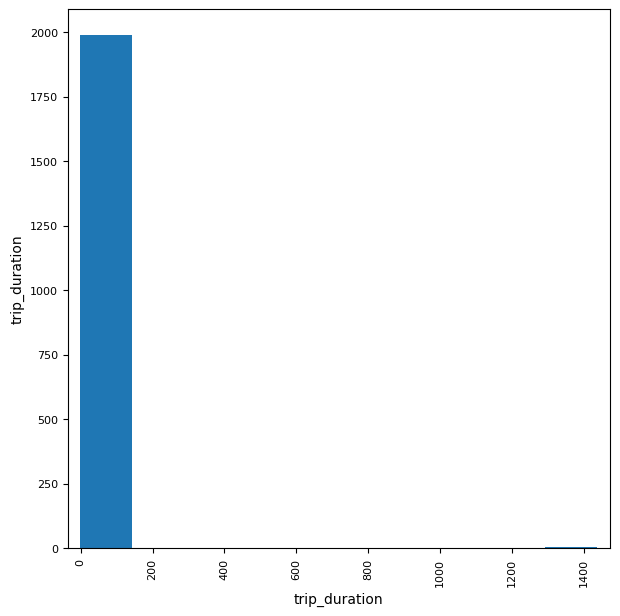

In [27]:
# Visualise the columns to be used for simple intuitive model
pd.plotting.scatter_matrix(frame = df[['fare_amount', 'trip_duration']], figsize=(7,7))


In [6]:
# # Remove the outliers
# df_filtered = df[(df['trip_distance'] >= 2) & (df['trip_distance'] <= 50) &\
#                  (df['fare_amount'] >= 3) & (df['fare_amount'] <=300) & \
#                  (df['trip_duration'] <= 200) & (df['trip_duration'] > 1)].copy()

# # Visualise the columns to be used for simple intuitive model
# pd.plotting.scatter_matrix(frame = df_filtered[['fare_amount', 'trip_distance', 'trip_duration']], figsize=(7,7));

TypeError: ignored

In [ ]:
# Write to csv
df.to_csv('data.csv')